In [3]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

In [4]:
# Path to your event files
event_files = glob.glob("../../runs/sac/**/events.*", recursive=True)

all_data = []

for file in event_files:
    for e in tf.compat.v1.train.summary_iterator(file):
        for v in e.summary.value:
            if v.HasField('simple_value'):  # Scalars only
                all_data.append({
                    'file': os.path.basename(file),
                    "path": file,
                    'tag': v.tag,
                    'step': e.step,
                    'value': v.simple_value
                })

df = pd.DataFrame(all_data)
print(df.head())


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`
                                                file  \
0  events.out.tfevents.1767962919.tcml-node18.360...   
1  events.out.tfevents.1767962919.tcml-node18.360...   
2  events.out.tfevents.1767962919.tcml-node18.360...   
3  events.out.tfevents.1767962919.tcml-node18.360...   
4  events.out.tfevents.1767962919.tcml-node18.360...   

                                                path                     tag  \
0  ../../runs/sac\sac__1__1.0__1000000__176796291...  charts/episodic_return   
1  ../../runs/sac\sac__1__1.0__1000000__176796291...  charts/episodic_length   
2  ../../runs/sac\sac__1__1.0__1000000__176796291...  charts/episodic_return   
3  ../../runs/sac\sac__1__1.0__1000000__176796291...  charts/episodic_length   
4  ../../runs/sac\sac__1__1.0__1000000__176796291...  charts/episodic_return   

   step      value  
0    34 -12.060977  
1    34  35.000000  
2    38 -12.450125  
3    38  39.

In [5]:
tag_to_plot = "charts/episodic_return"
df_filtered = df[df['tag'] == tag_to_plot]
df_filtered = df_filtered[["path", "step", "value"]]
df_filtered["path"] = df_filtered["path"].str.slice(15, 47)
print(df_filtered.head())

                               path  step      value
0  sac__1__1.0__1000000__1767962919    34 -12.060977
2  sac__1__1.0__1000000__1767962919    38 -12.450125
4  sac__1__1.0__1000000__1767962919    93 -15.239454
6  sac__1__1.0__1000000__1767962919   130   3.432352
8  sac__1__1.0__1000000__1767962919   241   7.917540


In [6]:
df_filtered["value_smooth"] = (
    df_filtered.groupby("path")["value"]
      .rolling(window=int(1e3), min_periods=int(1))
      .mean()
      .reset_index(level=0, drop=True)
)

In [ ]:
df_filtered["group key"] = df_filtered["path"]

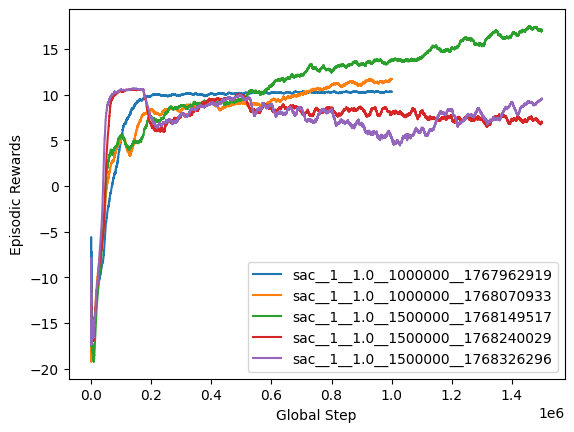

In [ ]:
fig, ax = plt.subplots()
for group, g in df_filtered.groupby("group_key"):
    ax.plot(g["step"], g["value_smooth"], label=group)
plt.xlabel("Global Step")
plt.ylabel("Episodic Rewards")
plt.legend()
plt.show()

In [8]:
fig.savefig('experiments.eps', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
